In [81]:
#u2 practica
import  pandas as pd
import tarfile
from pathlib import Path
import os
import urllib.request


def load_house_dataset():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path) 
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

datos = load_house_dataset()
print(datos.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [82]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [83]:
datos['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [84]:
datos.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


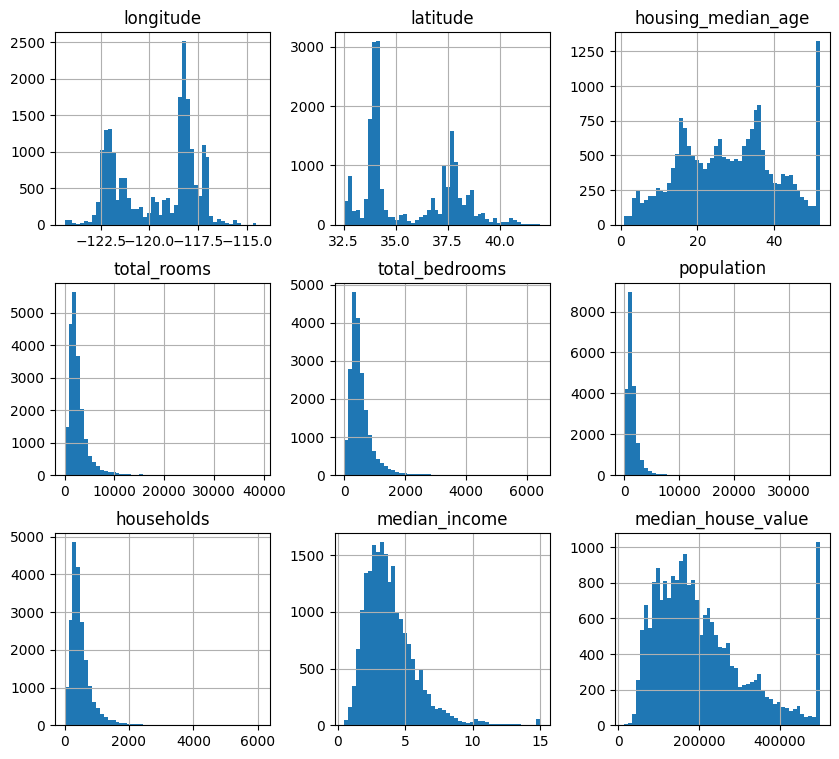

In [85]:
import matplotlib.pyplot as plt
datos.hist(figsize=(10,9),bins=50)
plt.show()

In [86]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(datos, test_size=0.2, random_state=42)

In [87]:
print(f"Train set: {len(train_set)} samples")
print(f"Test set: {len(test_set)} samples")
print(train_set.head(5))
print(test_set.head(5))

Train set: 16512 samples
Test set: 4128 samples
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196    -117.22     32.75                34.0       6001.0          1111.0   
8267     -117.03     32.69                10.0        901.0           163.0   
17445    -122.27     37.74                28.0       6909.0          1554.0   
14265    -121.82     37.25                25.0       4021.0           634.0   
2271     -115.98     33.32                 8.0        240.0            46.0   

       population  households  median_income  median_house_value  \
14196      2654.0      1072.0         4.5878            291000.0   
8267        698.0       167.0         4.6648            156100.0   
17445      2974.0      1484.0         3.6875            353900.0   
14265      2178.0       650.0         5.1663            241200.0   
2271         63.0        24.0         1.4688             53800.0   

      ocean_proximity  
14196      NEAR OCEAN  
8267       NEAR OCEA

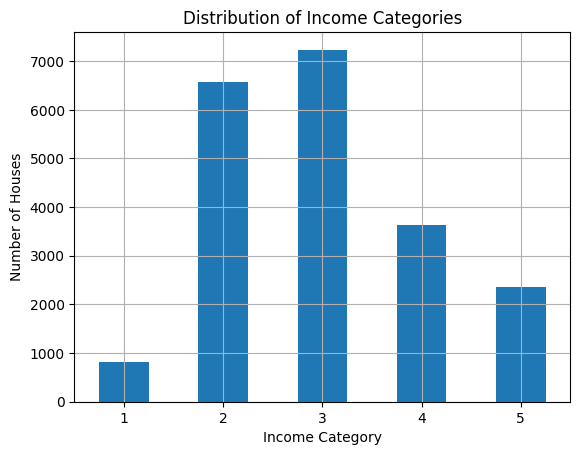

In [88]:
import numpy as np
datos['income_cat'] = pd.cut(datos['median_income'], bins= [0.0,1.5,3.0,4.5,6.0,np.inf], labels=[1,2,3,4,5])
datos['income_cat'].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel('Income Category')
plt.ylabel('Number of Houses')
plt.title('Distribution of Income Categories')
plt.show()


In [89]:
from sklearn.model_selection import StratifiedShuffleSplit
strat_train_set, strat_test_set = train_test_split(datos, test_size = 0.2, random_state= 42, stratify=datos['income_cat'])
print(f"Train set: {len(strat_train_set)} samples")
print(f"Test set: {len(strat_test_set)} samples")
print(strat_train_set['income_cat'].value_counts()/len(strat_train_set))
print(strat_test_set['income_cat'].value_counts()/len(strat_test_set))
# con lo anterior se ve que la distribucion de las categorias de ingreso es similar en ambos conjuntos, lo que no se cumple con el muestreo aleatorio simple, por lo que es mejor usar el muestreo estratificado.

Train set: 16512 samples
Test set: 4128 samples
income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64
income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64


In [90]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [91]:
for set in (strat_train_set, strat_test_set):
    set.drop('income_cat', axis=1, inplace=True)

print(strat_train_set.columns)
datos_train_copy = strat_train_set.copy()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


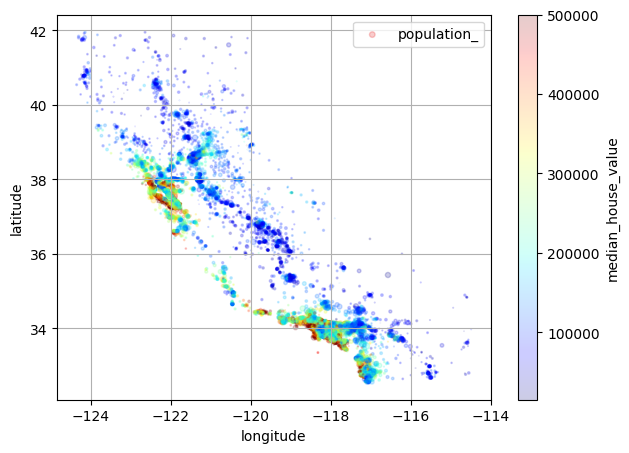

In [92]:
datos_train_copy.plot(kind='scatter', x='longitude', y='latitude', alpha=0.2,grid=True,
           s=datos_train_copy['population'] /500, label = 'population_', figsize=(7,5),
           c='median_house_value', cmap='jet', colorbar=True,
           sharex=False, sharey=False,
           legend=True
           
           
           
           )

plt.show()

In [94]:
corr_matrix = datos_train_copy.corr(numeric_only=True)
print(corr_matrix['median_house_value'].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64
